# Random Forest

- One decision tree tends to overfit the data.
- A random forest is a collection of decision trees that each tree is trained different from the others.
- After training, the random forest makes a prediction by averaging the predictions of each component tree.
- This will reduce the overfitting.

## Randomness in Random Forest

1. **Bootstrapped dataset**: Each tree in a random forest is trained on a random sample of the data.
      - The sample is the same size as the original dataset, but with replacement.
2. **Random subset of features**: The algorithm is allowed to choose a random subset of the features at each split.
      - Instead of finding the best test for each node, the algorithm selects the best test from a random subset of tests.

A parameter for feature selection is `max_features`:
- `max_features = n_features`: Consider all features. -> No randomness in feature selection.
- `max_features = 1`: Consider only one feature. -> High randomness in feature selection.
- A high `max_features`:
      - The trees will be similar.
      - They can train easily with most discriminative features.
- A low `max_features`:
      - The trees will be different.
      - Each tree need to be deep to fit the data well.


## Prediction in Random Forest

**Voting**: Each tree makes a class prediction, and the class with the most votes becomes the model's prediction.
- **Regression**: Each tree makes a prediction, and the average of the predictions becomes the model's prediction.
- **Classification**:
      - **Hard voting**: Each tree makes a class prediction, and the class with the most votes becomes the model's prediction.
      - **Soft voting**: Each tree makes a class prediction with a probability, and the average of the probabilities becomes the model's prediction.

## Analysis of Random Forest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mglearn

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

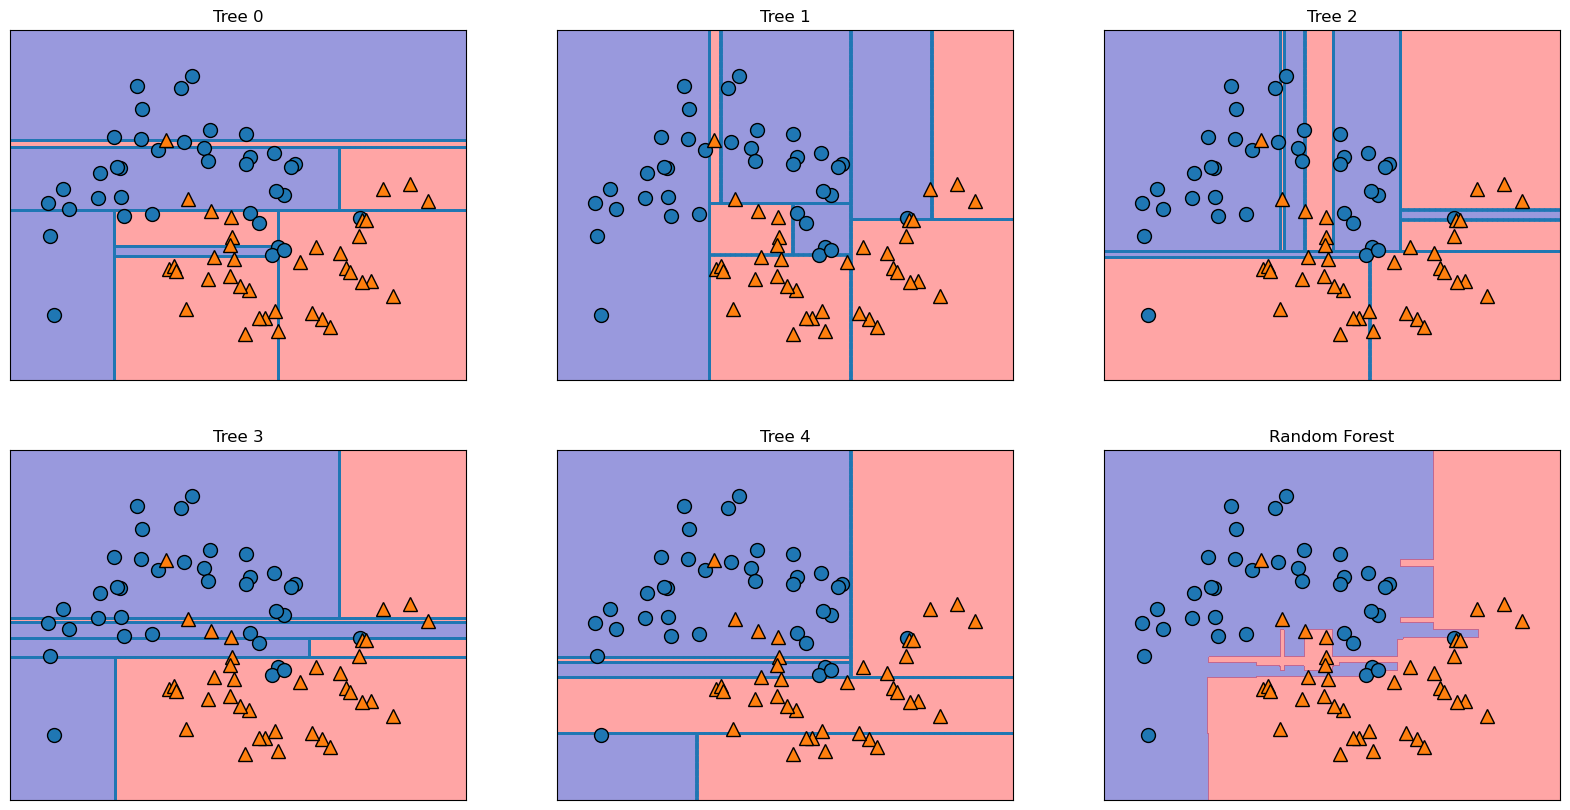

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(
    forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

- Each trees learned different decision boundaries.
- Each trees makes some mistakes, as they are trained on different samples that were not actually included in the training set.

- The random forest overfits less than any individual trees
- Provides a more intuitive decision boundary.

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accury on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accury on test set: 0.972


- The random forest gives better accuracy than the linear models or a single decision tree without any hyperparameter tuning.
- The default parameters of the random forest are usually good enough.

## Feature Importance in Random Forest

- The feature importance is calculated by the average depth of the feature in the trees.
- The feature importances of Random Forest are more reliable than those of a single decision tree.

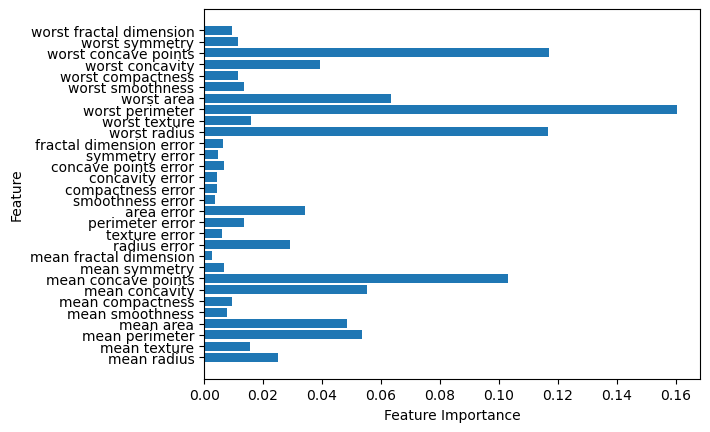

In [9]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)

- The random forest gives nonzero importance to more features than a single decision tree.
- It chooses "worst perimeter" as the most important feature, which is different from the single decision tree.

The randomness of random forest makes the algorithm to consider many possible explanations so that it captures a much broader picture of the data.

## Pros and Cons of Random Forest

Random forests are among the most widley used machine learning algorithms.

**Pros**:
    - Work well without heavy tuning.
    - Don't require scaling of the data.
    - Work well on very large datasets.
    - Give a good estimate of the feature importance.
    - Provide a good estimate of the test error without cross-validation.

**Cons**:
    - Not good for very high-dimensional sparse data (e.g., text data).
    - Require more memory and are slower to train and predict than linear models.
    - Not as easy to interpret as a single decision tree.

## Hyperparameters in Random Forest

- `n_estimators`: The number of trees in the forest.
    - Larger is always better, but more memory and time are required.
    - Rule of thumb: build "as many as you have time/memory for".
- `max_features`: The maximum number of features to consider for the best split.
    - Rule of thumb:
        - `auto`: `max_features = sqrt(n_features)`: For classification.
        - `None`: `max_features = n_features`: For regression.
    - `log2`: `max_features = log2(n_features)`
    - `0.2`: `max_features = 0.2 * n_features`

- `max_depth`: The maximum depth of the tree.
    - Larger is always better, but more memory and time are required.
    - Rule of thumb: `max_depth = 30` is good enough.

- `min_samples_split`: The minimum number of samples required to split an internal node.
    - Larger is always better, but more memory and time are required.
    - Rule of thumb: `min_samples_split = 2` is good enough.

- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
    - Larger is always better, but more memory and time are required.
    - Rule of thumb: `min_samples_leaf = 1` is good enough.

- `n_jobs`: The number of jobs to run in parallel with the number of processors.
    - `n_jobs = -1`: Use all processors.